No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


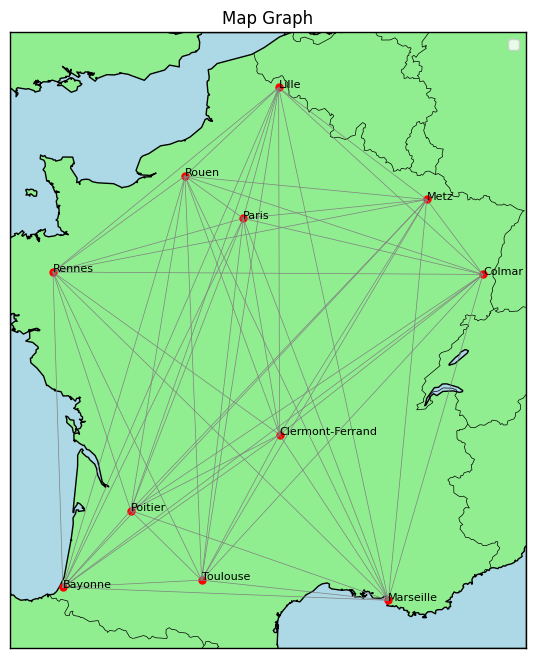

In [1]:
import numpy as np
import random
from Graphs.MapGraph import MapGraph
random.seed(0)
np,random.seed(0)

cities = ["Marseille", "Rouen", "Lille", "Rennes","Poitier", "Colmar", "Bayonne", "Toulouse","Paris","Metz","Clermont-Ferrand"]
#create real graph
graph = MapGraph(cities=cities,start_city="Rouen")
graph.plot_graph()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


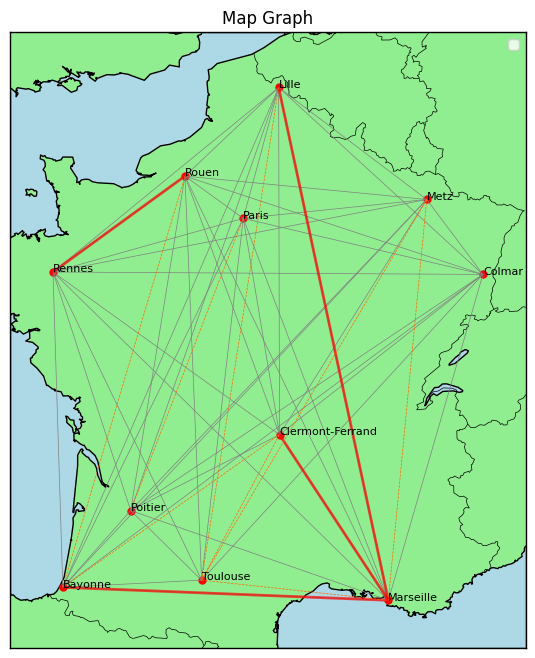

In [4]:
#Filtration
edge_blocking_percentage = 20
edge_costly_percentage = 10
graph.apply_edge_blocking(percentage=edge_blocking_percentage)
graph.apply_edge_costly(percentage=edge_costly_percentage)

if(edge_blocking_percentage > 0 or edge_costly_percentage > 0):
    graph.plot_graph()

Algorithm TABU : 

Execution time : 27.725432872772217 s (27725.432872772217 ms)
Best paths: [['Rouen', 'Lille', 'Clermont-Ferrand', 'Rennes', 'Marseille', 'Poitier', 'Toulouse', 'Bayonne', 'Metz', 'Colmar', 'Paris', 'Rouen']]
Total distance: 4298.693220415827
Distance per vehicles  : [4298.693220415827]
Average distance for each vehicles : 4298.693220415827
Standard deviation distance for each vehicles : 0.0
Number of iterations needed to find the solution : 29
Total number of iterations : 201


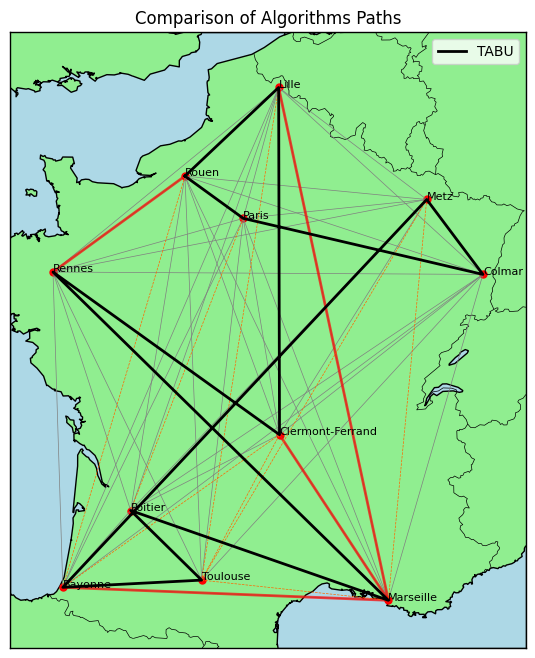

Algorithm ACO : 

Execution time : 13.88310194015503 s (13883.10194015503 ms)
Best paths: [['Rouen', 'Paris', 'Lille', 'Metz', 'Colmar', 'Clermont-Ferrand', 'Rennes', 'Bayonne', 'Toulouse', 'Poitier', 'Marseille', 'Rouen']]
Total distance: 3729.734160174812
Distance per vehicles  : [3729.734160174812]
Average distance for each vehicles : 3729.734160174812
Standard deviation distance for each vehicles : 0.0
Number of iterations needed to find the solution : 1
Total number of iterations : 201


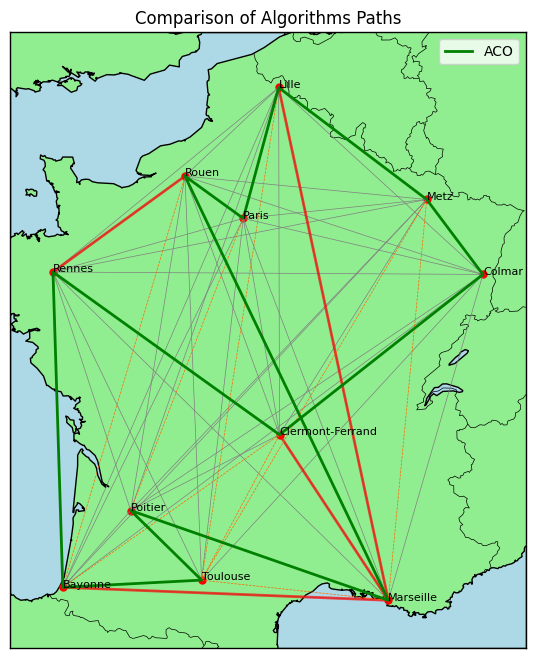

Algorithm GENETIC : 

Execution time : 9.995639085769653 s (9995.639085769653 ms)
Best paths: [['Rouen', 'Paris', 'Marseille', 'Poitier', 'Toulouse', 'Bayonne', 'Rennes', 'Clermont-Ferrand', 'Colmar', 'Metz', 'Lille', 'Rouen']]
Total distance: 3622.5832358390035
Distance per vehicles  : [3622.5832358390035]
Average distance for each vehicles : 3622.5832358390035
Standard deviation distance for each vehicles : 0.0
Number of iterations needed to find the solution : 23
Total number of iterations : 200


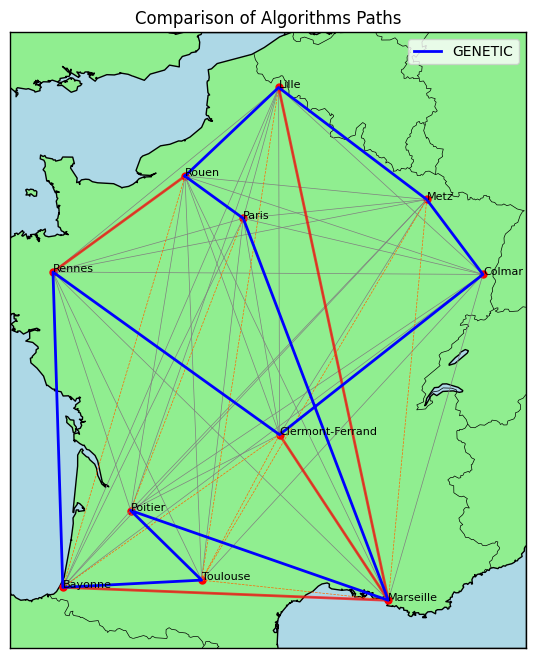

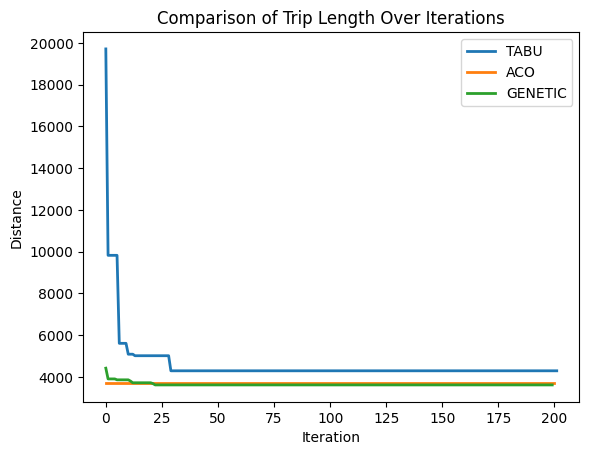

In [6]:
from Algorithms.ACO.AcoAlgo import AcoAlgo
from Algorithms.Tabu.TabuAlgo import TabuAlgo
from Algorithms.Genetic.GeneticAlgo import GeneticAlgo
from utils.plot import Plot

def run_algorithm(graph,algorithm,plot_path = True):
    algorithm.run()
    print(f"Algorithm {algorithm.name} : \n")
    vehicles_paths = {i + 1: path for i, path in enumerate(algorithm.paths)}
    current_path_results = {}
    algorithms_path_results = {}
    current_path_results[algorithm.name] = vehicles_paths
    algorithms_path_results[algorithm.name] = current_path_results[algorithm.name]
    
    # Print the best path found and the total distance
    print(f"Execution time : {algorithm.execution_time} s ({algorithm.execution_time * 1000} ms)")
    print(f"Best paths: {algorithm.paths}")
    print(f"Total distance: { algorithm.distance}")
    print(f"Distance per vehicles  : {algorithm.distance_per_vehicles}")
    print(f"Average distance for each vehicles : {algorithm.distance_average_per_vehicles}")
    print(f"Standard deviation distance for each vehicles : {algorithm.distance_standard_deviation_per_vehicles}")
    print(f"Number of iterations needed to find the solution : {algorithm.iterations_needed}")
    print(f"Total number of iterations : {algorithm.total_interations_realized}")
    if plot_path:
        graph.plot_graph(current_path_results)

def run_algorithms(graph, algorithms, plot_paths=True):
    algorithms_distance_results = {}

    for algorithm in algorithms:
        algorithm.run()

        algorithms_distance_results[algorithm.name] = algorithm.distance_history

        print(f"Algorithm {algorithm.name} : \n")
        vehicles_paths = {i + 1: path for i, path in enumerate(algorithm.paths)}
        print(f"Execution time : {algorithm.execution_time} s ({algorithm.execution_time * 1000} ms)")
        print(f"Best paths: {algorithm.paths}")
        print(f"Total distance: {algorithm.distance}")
        print(f"Distance per vehicles  : {algorithm.distance_per_vehicles}")
        print(f"Average distance for each vehicles : {algorithm.distance_average_per_vehicles}")
        print(f"Standard deviation distance for each vehicles : {algorithm.distance_standard_deviation_per_vehicles}")
        print(f"Number of iterations needed to find the solution : {algorithm.iterations_needed}")
        print(f"Total number of iterations : {algorithm.total_interations_realized}")

        if plot_paths:
            graph.plot_graph({algorithm.name: vehicles_paths})

    Plot.plot_distance_over_iterations_comparison(algorithms_distance_results)

max_iterations = 1000
convergence_threshold = 50
num_vehicles = 1
min_iterations = 200

ACO = AcoAlgo(graph,"ACO",num_vehicles,100,0.5,5,4.45,min_iterations,max_iterations,convergence_threshold)
TABU = TabuAlgo(graph,"TABU",num_vehicles,10,min_iterations,max_iterations,convergence_threshold)
GENETIC = GeneticAlgo(graph, "GENETIC",num_vehicles,1000, min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
algorithms = [TABU,ACO,GENETIC]
run_algorithms(graph,algorithms)